# Color Palette Visualization

This notebook contains color palette suggestions and visualization tools for adoption shift visualizations.


In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
import numpy as np

import dartwork_mpl as dm

dm.style.use("scientific")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Color palette suggestions for adoption shift visualization
# All colors verified to exist in dartwork-mpl color libraries
palettes = {
    "Current (Slate/Teal)": [
        "tw.slate800",
        "tw.slate600",
        "tw.gray500",
        "tw.teal500",
        "tw.emerald600",
        "tw.green500",
    ],
    "Warm Sunset": [
        "tw.orange700",
        "tw.red600",
        "tw.pink600",
        "tw.rose500",
        "tw.amber600",
        "tw.yellow500",
    ],
    "Cool Blues": [
        "tw.blue800",
        "tw.cyan700",
        "tw.sky600",
        "tw.indigo600",
        "tw.violet600",
        "tw.purple600",
    ],
    "Purple Gradient": [
        "tw.purple800",
        "tw.violet700",
        "tw.fuchsia600",
        "tw.pink500",
        "tw.rose400",
        "tw.pink300",
    ],
    "Earth Tones": [
        "tw.stone700",
        "tw.amber700",
        "tw.orange600",
        "tw.red600",
        "tw.stone600",
        "tw.stone500",
    ],
    "Ocean Depths": [
        "tw.slate700",
        "tw.blue700",
        "tw.cyan600",
        "tw.teal600",
        "tw.emerald500",
        "tw.green400",
    ],
    "Material Vibrant": [
        "md.blue700",
        "md.indigo600",
        "md.purple600",
        "md.pink500",
        "md.deeporange600",
        "md.red600",
    ],
    "Ant Design Professional": [
        "ad.blue7",
        "ad.cyan6",
        "ad.blue6",
        "ad.purple6",
        "ad.magenta6",
        "ad.red6",
    ],
    "Chakra Soft": [
        "cu.blue600",
        "cu.cyan500",
        "cu.teal500",
        "cu.green500",
        "cu.purple500",
        "cu.pink500",
    ],
    "High Contrast": [
        "tw.slate900",
        "tw.blue800",
        "tw.purple700",
        "tw.pink600",
        "tw.orange600",
        "tw.red600",
    ],
    "Pastel Dream": [
        "tw.blue300",
        "tw.cyan300",
        "tw.teal300",
        "tw.emerald300",
        "tw.green300",
        "tw.lime300",
    ],
    "Monochrome Elegant": [
        "tw.gray800",
        "tw.gray700",
        "tw.gray600",
        "tw.gray500",
        "tw.gray400",
        "tw.gray300",
    ],
    "Material Earth": [
        "md.brown700",
        "md.orange600",
        "md.deeporange600",
        "md.red600",
        "md.amber700",
        "md.yellow600",
    ],
    "Ant Warm": [
        "ad.volcano7",
        "ad.orange7",
        "ad.gold6",
        "ad.yellow6",
        "ad.lime6",
        "ad.green6",
    ],
    "Chakra Vibrant": [
        "cu.red600",
        "cu.orange500",
        "cu.yellow500",
        "cu.green500",
        "cu.teal500",
        "cu.cyan500",
    ],
}


In [12]:
def text_color(color):
    L, c, h = dm.named(color).to_oklch()
    if L > 0.5:
        return "black"
    else:
        return "white"


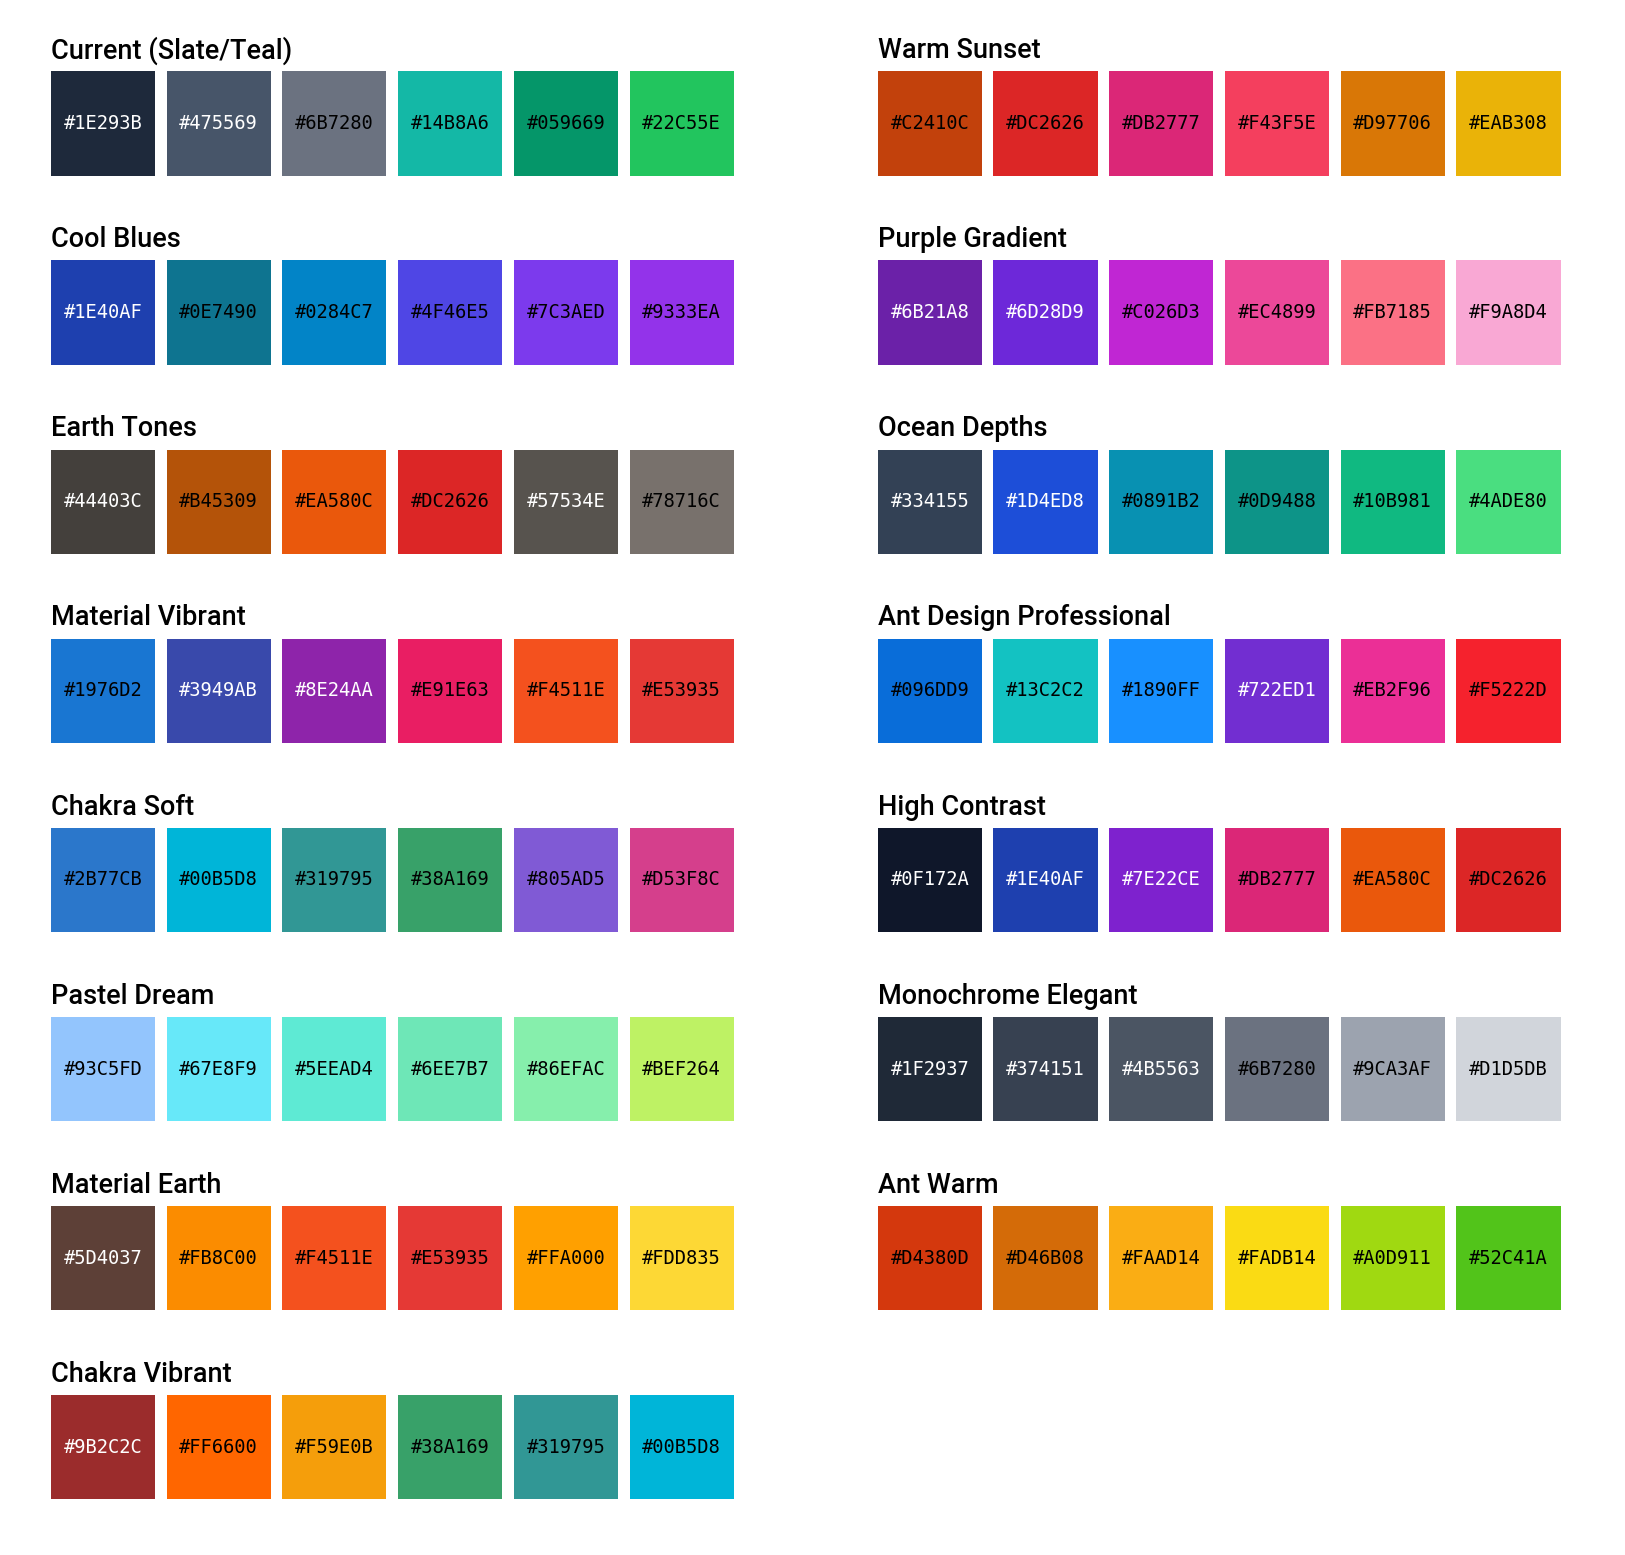

In [13]:
# Visualize palettes using style inspired by plot_colors() from util.py
n_palettes = len(palettes)
ncols = 2  # Two-column layout
nrows = (n_palettes + ncols - 1) // ncols

max_swatches = max(len(colors) for colors in palettes.values())

# Layout parameters inspired by _plot_single_library()
swatch_size = 0.9  # The width and height (in plot units) of each color swatch square
swatch_spacing = 0.1  # Horizontal space between adjacent swatches (in plot units)
side_margin = swatch_size * 0.2  # Equal padding on both left/right sides in plot units
swatch_start_x = side_margin  # First swatch starts after the left padding
name_x = swatch_start_x  # X-coordinate to place the palette name (if displayed left of first swatch)
margin = (
    0.5  # Margin (in plot units) between edge of figure and first/last drawing element
)

# Vertical placement derived from swatch geometry so everything scales together
swatch_y = swatch_size * 0.75  # Center line of the swatch row
title_gap_factor = 0.2
anvil_padding_factor = 0.2  # Extra space above the title for breathing room
horizontal_padding = side_margin

max_spacing_steps = max(max_swatches - 1, 0)
swatch_band_width = max_swatches * swatch_size + max_spacing_steps * swatch_spacing
cell_width = swatch_band_width + 2 * side_margin
swatch_top = swatch_y + swatch_size / 2
cell_height = swatch_top + swatch_size * (title_gap_factor + anvil_padding_factor)

fig_width = cell_width * ncols + 2 * margin
fig_height = cell_height * nrows + 2 * margin

fig, axes = plt.subplots(
    nrows, ncols, figsize=(dm.cm2in(fig_width), dm.cm2in(fig_height)), dpi=300
)
axes = axes.flatten() if n_palettes > 1 else [axes]

for idx, (name, colors) in enumerate(palettes.items()):
    ax = axes[idx]

    # Draw square color swatches with hex codes centered inside each chip
    for i, color in enumerate(colors):
        x_pos = swatch_start_x + i * (swatch_size + swatch_spacing)
        rect = plt.Rectangle(
            (x_pos, swatch_y - swatch_size / 2),
            swatch_size,
            swatch_size,
            facecolor=color,
            edgecolor="none",
            linewidth=0,
        )
        ax.add_patch(rect)
        hex_code = mcolors.to_hex(mcolors.to_rgb(color)).upper()
        ax.text(
            x_pos + swatch_size / 2,
            swatch_y,
            hex_code,
            ha="center",
            va="center",
            fontsize=dm.fs(-3),
            family="monospace",
            weight="light",
            color=text_color(color),
        )

    # Compute a dynamic title location so it never collides with the swatches
    title_gap = swatch_size * title_gap_factor
    name_y = swatch_top + title_gap
    max_name_y = cell_height - swatch_size * 0.1
    name_y = min(name_y, max_name_y)
    ax.text(
        name_x,
        name_y,
        name,
        ha="left",
        va="center",
        fontsize=dm.fs(-1),
        weight=dm.fw(2),
    )

    ax.set_xlim(0, cell_width)
    ax.set_ylim(0, cell_height)
    ax.set_aspect("equal", adjustable="box")
    ax.set_anchor("C")
    ax.axis("off")

# Hide unused subplots
for idx in range(n_palettes, len(axes)):
    axes[idx].axis("off")

# Adjust subplot spacing for two-column layout
plt.subplots_adjust(hspace=0.1, wspace=0.1)
dm.simple_layout(fig)
plt.show()

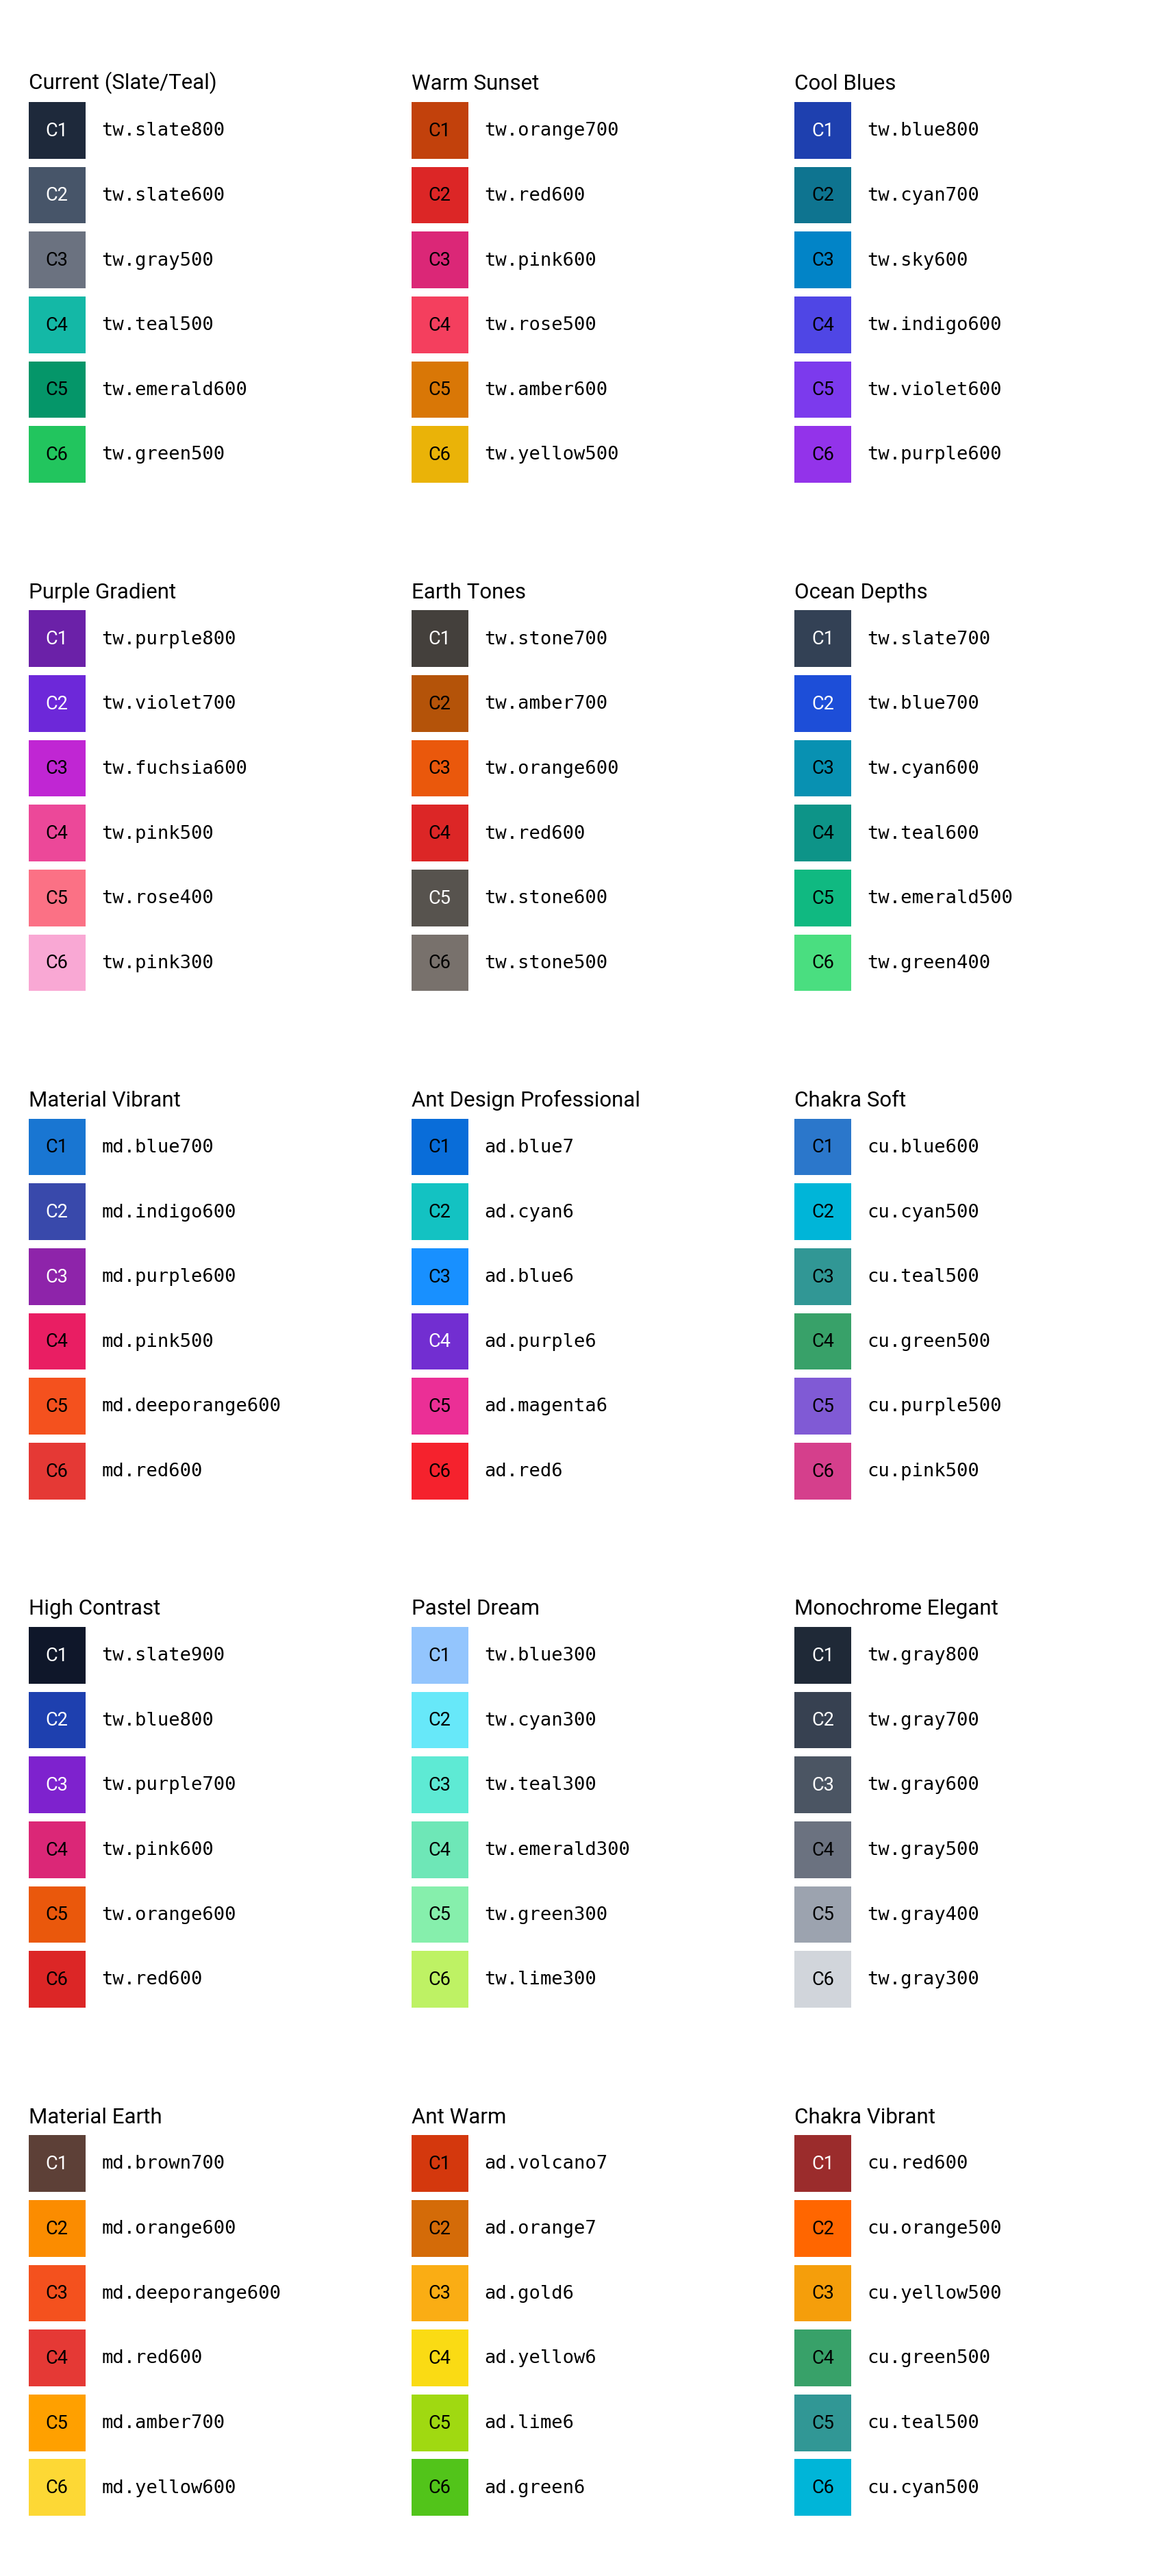

In [14]:
# Vertical version: color swatches stacked vertically with color names next to each swatch
n_palettes = len(palettes)
ncols = 3  # Three-column layout
nrows = (n_palettes + ncols - 1) // ncols  # Ceiling division

max_swatches = max(len(colors) for colors in palettes.values())

# Layout parameters for vertical layout
cell_width = 4.5  # Trim horizontal footprint so cards feel taller
swatch_size = 0.7  # Taller swatches stretch the column vertically
swatch_spacing = 0.1  # More breathing room between swatches
margin = 0.35  # Slightly larger margin to balance taller figure

spacing_steps = max(max_swatches - 1, 0)
total_swatch_height = max_swatches * swatch_size + spacing_steps * swatch_spacing
cell_height = (
    total_swatch_height + 1.5
)  # Boost card height to cut down empty outer bands

fig_width = cell_width * ncols + 2 * margin
fig_height = cell_height * nrows + 2 * margin

fig, axes = plt.subplots(
    nrows, ncols, figsize=(dm.cm2in(fig_width), dm.cm2in(fig_height)), dpi=300
)
axes = axes.flatten() if n_palettes > 1 else [axes]

for idx, (name, colors) in enumerate(palettes.items()):
    ax = axes[idx]

    # Layout for vertical arrangement
    swatch_start_x = 0.1  # Slightly smaller gutter so columns read taller
    name_x = swatch_start_x
    label_offset_x = 0.20  # Restore spacing so labels do not feel cramped
    swatch_count = len(colors)
    spacing_steps = max(swatch_count - 1, 0)
    total_swatch_height = swatch_count * swatch_size + spacing_steps * swatch_spacing
    free_height = max(cell_height - total_swatch_height, 0)
    title_gap = (
        free_height * 0.35
    )  # Portion of free height reserved for the palette title
    body_gap = free_height - title_gap
    swatch_bottom_y = body_gap / 2  # Center remaining space around swatches

    # Draw square color swatches vertically (C1 at the top)
    for i, color in enumerate(colors):
        y_pos = swatch_bottom_y + (swatch_count - 1 - i) * (
            swatch_size + swatch_spacing
        )
        x_pos = swatch_start_x

        ax.add_patch(
            plt.Rectangle(
                (x_pos, y_pos),
                swatch_size,
                swatch_size,
                facecolor=color,
                edgecolor="none",
                linewidth=0,
            )
        )

        ax.text(
            x_pos + swatch_size / 2,
            y_pos + swatch_size / 2,
            f"C{i + 1}",
            ha="center",
            va="center",
            fontsize=dm.fs(-1),
            color=text_color(color),
            weight=dm.fw(1),
        )

        color_name = f"{color}"
        ax.text(
            x_pos + swatch_size + label_offset_x,
            y_pos + swatch_size / 2,
            color_name,
            ha="left",
            va="center",
            fontsize=dm.fs(-1),
            family="monospace",
            weight=dm.fw(0),
        )

    top_swatch_top = (
        swatch_bottom_y
        + (swatch_count - 1) * (swatch_size + swatch_spacing)
        + swatch_size
    )
    name_y = top_swatch_top + max(
        title_gap * 0.2, 0.1
    )  # Tie label offset to reserved title space
    ax.text(
        name_x, name_y, name, ha="left", va="bottom", fontsize=dm.fs(0), weight=dm.fw(1)
    )

    ax.set_xlim(0, cell_width)
    ax.set_ylim(0, cell_height)
    ax.set_aspect("equal", adjustable="box")  # Keep swatches visually square
    ax.axis("off")

# Hide unused subplots
for idx in range(n_palettes, len(axes)):
    axes[idx].axis("off")

# Adjust subplot spacing for denser grid
plt.subplots_adjust(hspace=0.01, wspace=0.05)
dm.simple_layout(fig)
plt.show()